_Fashion-MNIST veri kümesini kullanarak:_
- _Veri setini yükleyin ve verileri normalleştirmek gibi ön işlemlerinizi yapın. N_components = 2 ayarını yaparak verilere t-SNE uygulayın._
- _İki boyutlu t-SNE gösterimini kullanarak, derste yaptığımız gibi veri noktalarını renklendirip sınıflandırarak verilerin bir grafiğini çizin._
- _T-SNE çözümünün tatmin edici olduğunu düşünüyor musunuz? Farklı sınıfları kolayca ayırt edebiliyor musunuz? Hangisi daha iyi bir sonuç verdi: t-SNE mi? PCA mi?_
- _Şimdi, farklı çarpıklık değerleri deneyin ve her biri için t-SNE uygulayın. İki boyutlu gösterim açıklığı açısından hangi çarpıklık değeri en iyisidir?_

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('Fashion-MNIST', version = 1, cache = True)

In [3]:
np.random.seed(42)

idx = np.random.choice(70000,10000)
x = mnist.data[idx]
y = mnist.target[idx].astype(np.int64)

x_std = StandardScaler().fit_transform(x)

In [4]:
time_start = time.time()
x_tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300).fit_transform(x_std)
print('Geçen zaman: {} sn'.format(time.time()-time_start))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.791s...
[t-SNE] Computed neighbors for 10000 samples in 188.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.277383
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.402275
[t-SNE] KL divergence after 300 iterations: 3.532599
Geçen zaman: 230.4187774

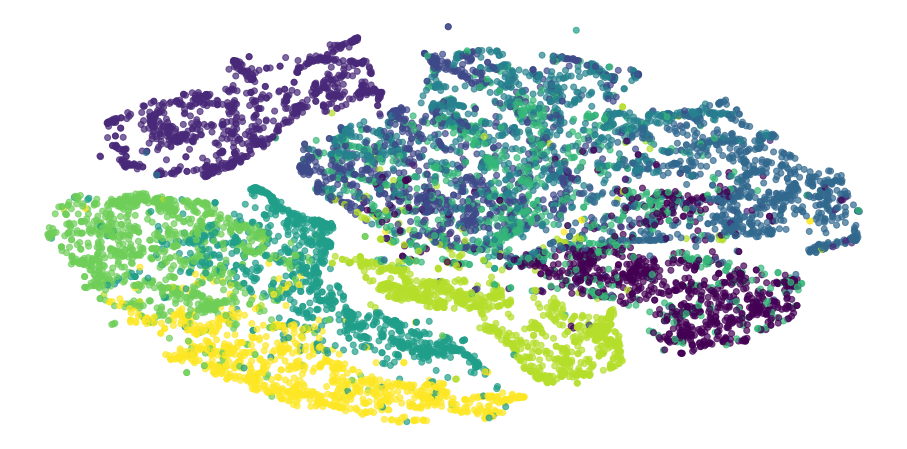

In [5]:
plt.figure(figsize=(16,8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], alpha = 0.7, c = y)
plt.axis('off')
plt.show()

In [6]:
time_start = time.time()
x_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(x_std)
print('Geçen zaman: {} sn'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.592s...
[t-SNE] Computed neighbors for 10000 samples in 176.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.355002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.420540
[t-SNE] KL divergence after 300 iterations: 2.587109
Geçen zaman: 231.477046

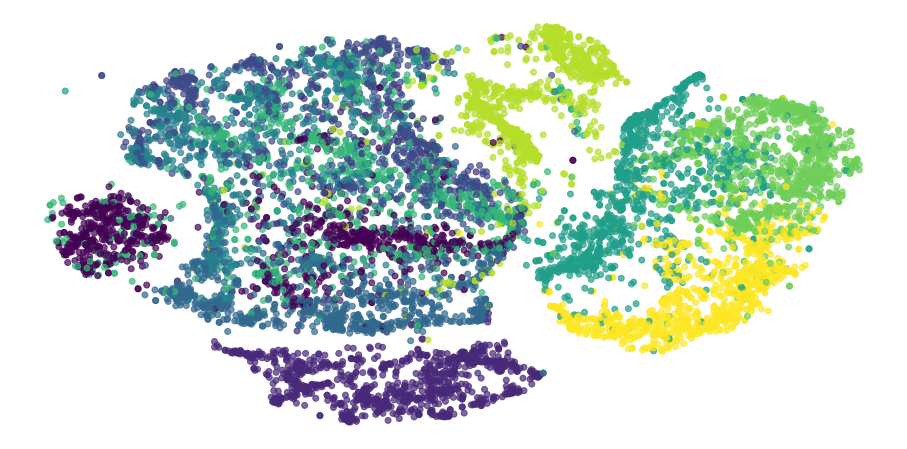

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], alpha = 0.7, c = y)
plt.axis('off')
plt.show()

In [8]:
%time x_tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300).fit_transform(x_std)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 4.643s...
[t-SNE] Computed neighbors for 10000 samples in 171.609s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.077091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.775665
[t-SNE] KL divergence after 300 iterations: 1.989937
Wall time: 4min 4s


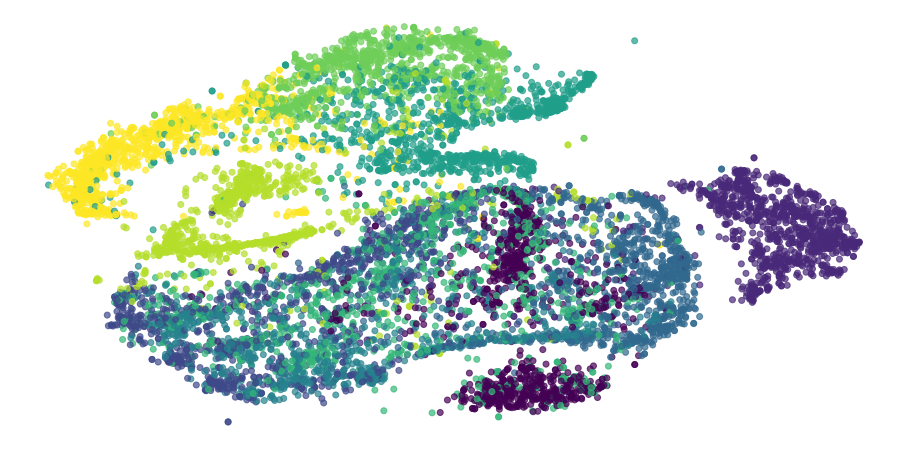

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], alpha = 0.7, c = y)
plt.axis('off')
plt.show()

> t-SNE tüm kümeleri keşfetmek için uygun performası göstermedi, ama PCA yöntemine göre daha anlamlı sonuçlar verdi. Kullanılan parametreler arasından perplexity=40 en iyi sonucu verdi. n_iter=300 parametresinin değiştirilmesi ile daha iyi sonuçlar alınabilir.